In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt

import zhinst.toolkit as tk

# Initialize UHFQA

In [2]:
qa = tk.UHFQA("qa1", "dev2266", interface="1gbe")
qa.setup() # set up data server connection
qa.connect_device() # connect device to data server

Successfully connected to data server at localhost8004 api version: 6
Successfully connected to device DEV2266 on interface 1GBE


In [3]:
help(qa)

Help on UHFQA in module zhinst.toolkit.uhfqa object:

class UHFQA(zhinst.toolkit.base.BaseInstrument)
 |  High-level controller for UHFQA. Inherits from BaseInstrument and defines 
 |  UHFQA specific methods. The property awg_connection accesses the 
 |  connection's awg module and is used in the AWG core as 
 |  awg._parent._awg_module
 |  
 |  The UHFQA has one awg core and ten ReadoutChannels that can  be accessed as 
 |  properties of the object.
 |  
 |  Method resolution order:
 |      UHFQA
 |      zhinst.toolkit.base.BaseInstrument
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, name, serial, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  disable_readout_channels(self, channels)
 |  
 |  enable_readout_channels(self, channels)
 |  
 |  write_crottalk_matrix(self, matrix)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  awg
 |  
 | 

In [4]:
# properties of UHFQA
print(f"name: {qa.name}")
print(f"serial: {qa.serial}")
print(f"type: {qa.device_type}")
print(f"interface: {qa.interface}")
print(f"connected: {qa.is_connected}")

name: qa1
serial: dev2266
type: uhfqa
interface: 1gbe
connected: True


 ## Access the device's nodetree  

In [5]:
qa.nodetree

nodes:
 - stats
 - osc
 - triggers
 - status
 - dio
 - auxin
 - scope
 - system
 - sigins
 - sigouts
 - features
 - auxouts
 - awg
 - qa
parameters:
 - clockbase

In [6]:
# navigate through nodetree
qa.nodetree.sigouts

Iterable node with 2 items: 

Node 1:
nodes:
 - enables
 - amplitudes
parameters:
 - imp50
 - on
 - range
 - over
 - offset
 - autorange


Node 2:
nodes:
 - enables
 - amplitudes
parameters:
 - imp50
 - on
 - range
 - over
 - offset
 - autorange


In [7]:
# see the description of a parameter
qa.nodetree.osc.freq

Node: /DEV2266/OSCS/0/FREQ
Description: Frequency control for each oscillator.
Type: Double
Properties: Read, Write, Setting
Options: None
Unit: Hz
Value: None

In [8]:
# get parameter value
qa.nodetree.osc.freq()

100000000.00000285

In [9]:
qa.nodetree.osc.freq(100e6)

100000000.0

## Control AWG of UHFQA

In [10]:
qa.awg

qa1: <zhinst.toolkit.uhfqa.AWG object at 0x0000021091FD4DA0>
    parent  : <zhinst.toolkit.uhfqa.UHFQA object at 0x0000021091FD4C18>
    index   : 0
    sequence: 
           type: None
            ('target', 'uhfqa')
            ('clock_rate', 2400000000.0)
            ('period', 0.0001)
            ('trigger_mode', 'None')
            ('repetitions', 1)
            ('alignment', 'End with Trigger')
            ('n_HW_loop', 1)
            ('dead_time', 5e-06)
            ('trigger_delay', 0)
            ('latency', 1.6e-07)
            ('trigger_cmd_1', '//\n')
            ('trigger_cmd_2', '//\n')
            ('wait_cycles', 0)
            ('dead_cycles', 0)

In [11]:
help(qa.awg)

Help on AWG in module zhinst.toolkit.uhfqa object:

class AWG(zhinst.toolkit.awg_core.AWGCore)
 |  Device-specific AWG for UHFQA with properties like ouput or gains and 
 |  sequence specific settings for the UHFQA. Inherits from AWGCore.
 |  
 |  Method resolution order:
 |      AWG
 |      zhinst.toolkit.awg_core.AWGCore
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, parent, index)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  compile(self)
 |  
 |  outputs(self, value=None)
 |  
 |  update_readout_params(self)
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from zhinst.toolkit.awg_core.AWGCore:
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  compile_and_upload_waveforms(self)
 |  
 |  queue_waveform(self, wave1, wave2)
 |  
 |  replace_waveform(self, wave1, wave2, i=0)
 |  
 |  reset_queue(self)
 |  
 |  run(self)
 |  
 |  set_sequence_params(self, **kw

In [12]:
# turn the outputs on and off
qa.awg.outputs("on")
time.sleep(0.5)
qa.awg.output1("off")
time.sleep(0.5)
qa.awg.output2("off")

0

## Readout Channels of the UHFQA

In [13]:
qa.channels

[Readout Channel 0:  <zhinst.toolkit.uhfqa.ReadoutChannel object at 0x0000021091FD4F28>
      rotation          : 0.0
      threshold         : 0.0
       Weighted Integration Disabled,
 Readout Channel 1:  <zhinst.toolkit.uhfqa.ReadoutChannel object at 0x0000021091FFC048>
      rotation          : 0.0
      threshold         : 0.0
       Weighted Integration Disabled,
 Readout Channel 2:  <zhinst.toolkit.uhfqa.ReadoutChannel object at 0x0000021091FFC128>
      rotation          : 0.0
      threshold         : 0.0
       Weighted Integration Disabled,
 Readout Channel 3:  <zhinst.toolkit.uhfqa.ReadoutChannel object at 0x0000021091FFC208>
      rotation          : 0.0
      threshold         : 0.0
       Weighted Integration Disabled,
 Readout Channel 4:  <zhinst.toolkit.uhfqa.ReadoutChannel object at 0x0000021091FFC2E8>
      rotation          : 0.0
      threshold         : 0.0
       Weighted Integration Disabled,
 Readout Channel 5:  <zhinst.toolkit.uhfqa.ReadoutChannel object at 0x

In [14]:
freqs = [85.6e6, 101.3e6, 132.8e6]

for ch in qa.channels[:3]:
    ch.enable()
    ch.readout_frequency(freqs[ch.index])

In [15]:
qa.channels

[Readout Channel 0:  <zhinst.toolkit.uhfqa.ReadoutChannel object at 0x0000021091FD4F28>
      rotation          : 0.0
      threshold         : 0.0
      readout_frequency : 85600000.0
      readout_amplitude : 1
      phase_shift       : 0,
 Readout Channel 1:  <zhinst.toolkit.uhfqa.ReadoutChannel object at 0x0000021091FFC048>
      rotation          : 0.0
      threshold         : 0.0
      readout_frequency : 101300000.0
      readout_amplitude : 1
      phase_shift       : 0,
 Readout Channel 2:  <zhinst.toolkit.uhfqa.ReadoutChannel object at 0x0000021091FFC128>
      rotation          : 0.0
      threshold         : 0.0
      readout_frequency : 132800000.0
      readout_amplitude : 1
      phase_shift       : 0,
 Readout Channel 3:  <zhinst.toolkit.uhfqa.ReadoutChannel object at 0x0000021091FFC208>
      rotation          : 0.0
      threshold         : 0.0
       Weighted Integration Disabled,
 Readout Channel 4:  <zhinst.toolkit.uhfqa.ReadoutChannel object at 0x0000021091FFC2E8

In [16]:
qa.awg.set_sequence_params(
    sequence_type="Readout",
    trigger_mode="External Trigger",
    alignment="Start with Trigger",
    repetitions=100,
)
qa.awg.update_readout_params()

In [17]:
qa.awg

qa1: <zhinst.toolkit.uhfqa.AWG object at 0x0000021091FD4DA0>
    parent  : <zhinst.toolkit.uhfqa.UHFQA object at 0x0000021091FD4C18>
    index   : 0
    sequence: 
           type: Readout
            ('target', 'uhfqa')
            ('clock_rate', 1800000000.0)
            ('period', 0.0001)
            ('trigger_mode', 'External Trigger')
            ('repetitions', 100)
            ('alignment', 'Start with Trigger')
            ('n_HW_loop', 1)
            ('dead_time', 5e-06)
            ('trigger_delay', 0)
            ('latency', 1.6e-07)
            ('trigger_cmd_1', 'waitDigTrigger(1, 1);\n')
            ('trigger_cmd_2', '//\n')
            ('wait_cycles', 21339)
            ('dead_cycles', 675)
            ('readout_length', 2e-06)
            ('readout_amplitudes', [1, 1, 1])
            ('readout_frequencies', [85600000.0, 101300000.0, 132800000.0])
            ('phase_shifts', [0, 0, 0])

In [18]:
qa.awg.compile()

Compilation successful
qa1-0: Sequencer status: ELF file uploaded


In [19]:
qa.awg.run()

Started AWG qa1-0!


In [20]:
qa.awg.is_running
# waiting for the input trigger ...

1

In [21]:
qa.awg.stop()

Stopped AWG qa1-0!


In [22]:
qa.result_source("integration")
for ch in qa.channels[:3]:
    print(ch.result())

[-173.85831867-365.05326772j]
[-173.85831867-365.05326772j]
[-173.85831867-365.05326772j]


## Pulsed Spectroscopy

In [37]:
qa.awg.set_sequence_params(
    sequence_type="Pulsed Spectroscopy",
    trigger_mode="Send Trigger",
    alignment="End with Trigger",
    repetitions=1,
    period=10e-6,
    pulse_length=5e-6,
)
qa.awg.compile()

Compilation successful
qa1-0: Sequencer status: ELF file uploaded


In [47]:
qa.awg.outputs("on")
qa.result_source("integration")
qa.integration_time(5e-6)

qa.nodetree.qa.deskew.rows[1].cols[0](1)
qa.nodetree.qa.deskew.rows[1].cols[1](0)


qa.nodetree.qa.integration.sources[0](0)
qa.nodetree.qa.integration.sources[1](0)
qa.channels[0].rotation(0)
qa.channels[1].rotation(0)

qa.nodetree.qa.result.enable(1)
qa.nodetree.qa.result.length(1001)
qa.nodetree.qa.result.enable(1)

1

In [56]:
freqs = np.linspace(10e6, 50e6, 1001)

tok = time.time()

for f in freqs:
    qa.nodetree.osc.freq(f)
    qa.awg.run()
    time.sleep(0.02)
    
time.sleep(0.5)
res = qa.channels[0].result()

print(time.time() - tok)

Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG qa1-0!
Started AWG 

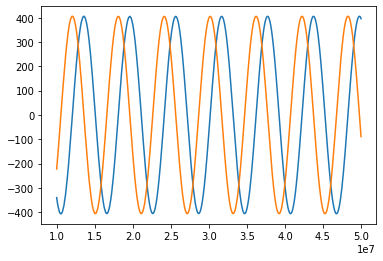

In [54]:
plt.plot(freqs, np.real(res))
plt.plot(freqs, np.imag(res))
plt.show()

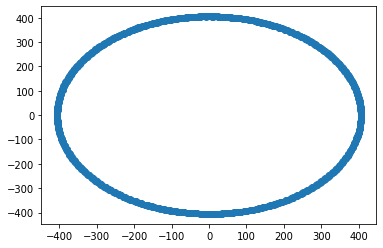

In [55]:
plt.scatter(np.real(res), np.imag(res))
plt.show()